---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Merging Dataframes


In [1]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Name,Item Purchased,Cost
Store 1,Chris,Sponge,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Filip,Spoon,5.0


In [2]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Name,Item Purchased,Cost,Date
Store 1,Chris,Sponge,22.5,December 1
Store 1,Kevyn,Kitty Litter,2.5,January 1
Store 2,Filip,Spoon,5.0,mid-May


In [3]:
df['Delivered'] = True
df

,Name,Item Purchased,Cost,Date,Delivered
Store 1,Chris,Sponge,22.5,December 1,True
Store 1,Kevyn,Kitty Litter,2.5,January 1,True
Store 2,Filip,Spoon,5.0,mid-May,True


In [14]:
df['Feedback'] = ['Positive', None, 'Negative']
df

,Name,Item Purchased,Cost,Date,Delivered,Feedback
Store 1,Chris,Sponge,22.5,December 1,True,Positive
Store 1,Kevyn,Kitty Litter,2.5,January 1,True,None
Store 2,Filip,Spoon,5.0,mid-May,True,Negative


In [15]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Name,Item Purchased,Cost,Date,Delivered,Feedback
0,Store 1,Chris,Sponge,22.5,December 1,True,Positive
1,Store 1,Kevyn,Kitty Litter,2.5,NaN,True,None
2,Store 2,Filip,Spoon,5.0,mid-May,True,Negative


In [16]:
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Name,Item Purchased,Cost,Date,Delivered,Feedback
0,Store 1,Chris,Sponge,22.5,December 1,True,Positive
1,Store 1,Kevyn,Kitty Litter,2.5,NaN,True,None
2,Store 2,Filip,Spoon,5.0,mid-May,True,Negative


In [17]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [18]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [8]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Sally,Course liasion,Engineering


In [9]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [10]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [11]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [19]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


In [21]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


In [22]:
pd.merge(staff_df, student_df, how='inner', left_on=['First Name'], right_on=['First Name'])

,First Name,Last Name_x,Role,Last Name_y,School
0,Sally,Brooks,Course liasion,Brooks,Engineering
1,James,Wilde,Grader,Hammond,Business


# Idiomatic Pandas: Making Code Pandorable

In [24]:
import pandas as pd
df = pd.read_csv('census.csv')
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [26]:
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County           54571.0              54571.0   
        Baldwin County          182265.0             182265.0   
        Barbour County           27457.0              27457.0   
        Bibb County              22915.0              22919.0   
        Blount County            57322.0              57322.0   
...                                  ...                  ...   
Wyoming Sweetwater County        43806.0              43806.0   
        Teton County             21294.0              21294.0   
        Uinta County             21118.0              21118.0   
        Washakie County           8533.0               8533.0   
        Weston County             7208.0               7208.0   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County             54660.0          55253.0          55175.0   
        Baldwin County            183193.0         186659.0         190396.0   
        Barbour County             27341.0          27226.0          27159.0   
        Bibb County                22861.0          22733.0          22642.0   
        Blount County              57373.0          57711.0          57776.0   
...                                    ...              ...              ...   
Wyoming Sweetwater County          43593.0          44041.0          45104.0   
        Teton County               21297.0          21482.0          21697.0   
        Uinta County               21102.0          20912.0          20989.0   
        Washakie County             8545.0           8469.0           8443.0   
        Weston County               7181.0           7114.0           7065.0   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

In [37]:
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})
    .sort_values(['DIVISION','CENSUS2010POP']))
# only support
# .sort_values(['DIVISION','CENSUS2010POP']))
# .sort_values(['DIVISION'], ascending = 0))
# do not support
# .sort_values(['DIVISION','CENSUS2010POP'], ascending = 0))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME        CTYNAME                                                          
Vermont       Essex County             50.0     1.0       1.0   50.0     9.0   
              Grand Isle County        50.0     1.0       1.0   50.0    13.0   
Massachusetts Nantucket County         50.0     1.0       1.0   25.0    19.0   
              Dukes County             50.0     1.0       1.0   25.0     7.0   
Maine         Piscataquis County       50.0     1.0       1.0   23.0    21.0   
...                                     ...     ...       ...    ...     ...   
California    San Bernardino County    50.0     4.0       9.0    6.0    71.0   
              Riverside County         50.0     4.0       9.0    6.0    65.0   
              Orange County            50.0     4.0       9.0    6.0    59.0   
              San Diego County         50.0     4.0       9.0    6.0    73.0   
              Los Angeles County       50.0     4.0       9.0    6.0    37.0   

                                     CENSUS2010POP  Estimates Base 2010  \
STNAME        CTYNAME                                                     
Vermont       Essex County                  6306.0               6306.0   
              Grand Isle County             6970.0               6970.0   
Massachusetts Nantucket County             10172.0              10172.0   
              Dukes County                 16535.0              16535.0   
Maine         Piscataquis County           17535.0              17535.0   
...                                            ...                  ...   
California    San Bernardino County      2035210.0            2035212.0   
              Riverside County           2189641.0            2189760.0   
              Orange County              3010232.0            3010266.0   
              San Diego County           3095313.0            3095308.0   
              Los Angeles County         9818605.0            9818700.0   

                                     POPESTIMATE2010  POPESTIMATE2011  \
STNAME        CTYNAME                                                   
Vermont       Essex County                    6302.0           6328.0   
              Grand Isle County               6952.0           6978.0   
Massachusetts Nantucket County               10164.0          10141.0   
              Dukes County                   16557.0          16680.0   
Maine         Piscataquis County             17546.0          17359.0   
...                                              ...              ...   
California    San Bernardino County        2041642.0        2064200.0   
              Riverside County             2202286.0        2237433.0   
              Orange County                3017866.0        3056084.0   
              San Diego County             3104386.0        3142256.0   
              Los Angeles County           9826009.0        9896602.0   

                                     POPESTIMATE2012  ...  RDOMESTICMIG2011  \
STNAME        CTYNAME                                 ...                     
Vermont       Essex County                    6223.0  ...          1.425178   
              Grand Isle County               6970.0  ...          1.435750   
Massachusetts Nantucket County               10331.0  ...        -14.183699   
              Dukes County                   16788.0  ...          5.897042   
Maine         Piscataquis County             17269.0  ...         -4.583871   
...                                              ...  ...               ...   
California    San Bernardino County        2079526.0  ...          0.127623   
              Riverside County             2267556.0  ...          6.363916   
              Orange County                3089343.0  ...          1.992772   
              San Diego County             3184358.0  ...          0.354751   
              Los Angeles County           9970436.0  ...         -4.999439   

                                     RDOME

In [34]:
df.sort_values?

In [16]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County          50       3         6      1       1   
          Baldwin County          50       3         6      1       3   
          Barbour County          50       3         6      1       5   
          Bibb County             50       3         6      1       7   
          Blount County           50       3         6      1       9   
          Bullock County          50       3         6      1      11   
          Butler County           50       3         6      1      13   
          Calhoun County          50       3         6      1      15   
          Chambers County         50       3         6      1      17   
          Cherokee County         50       3         6      1      19   
          Chilton County          50       3         6      1      21   
          Choctaw County          50       3         6      1      23   
          Clarke County           50       3         6      1      25   
          Clay County             50       3         6      1      27   
          Cleburne County         50       3         6      1      29   
          Coffee County           50       3         6      1      31   
          Colbert County          50       3         6      1      33   
          Conecuh County          50       3         6      1      35   
          Coosa County            50       3         6      1      37   
          Covington County        50       3         6      1      39   
          Crenshaw County         50       3         6      1      41   
          Cullman County          50       3         6      1      43   
          Dale County             50       3         6      1      45   
          Dallas County           50       3         6      1      47   
          DeKalb County           50       3         6      1      49   
          Elmore County           50       3         6      1      51   
          Escambia County         50       3         6      1      53   
          Etowah County           50       3         6      1      55   
          Fayette County          50       3         6      1      57   
          Franklin County         50       3         6      1      59   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County         50       2         3     55     129   
          Washington County       50       2         3     55     131   
          Waukesha County         50       2         3     55     133   
          Waupaca County          50       2         3     55     135   
          Waushara County         50       2         3     55     137   
          Winnebago County        50       2         3     55     139   
          Wood County             50       2         3     55     141   
Wyoming   Albany County           50       4         8     56       1   
          Big Horn County         50       4         8     56       3   
          Campbell County         50       4         8     56       5   
          Carbon County           50       4         8     56       7   
          Converse County         50       4         8     56       9   
          Crook County            50       4         8     56      11   
          Fremont County          50       4         8     56      13   
          Goshen County           50       4         8     56      15   
          Hot Springs County      50       4         8     56      17   
          Johnson County          50       4         8     56      19   
          Laramie County          50       4         8     56      21   
          Lincoln County          50       4         8     56      23   
          Natrona County          50       4         8     56      25   
          Niobrara County         50       4         8     56      27   
          Park County             50       4         8     56      29   
          Platt

In [39]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [40]:
df.apply(min_max, axis=1)

,min,max
0,4785161,4858979
1,54660,55347
2,183193,203709
3,26489,27341
4,22512,22861
...,...,...
3188,43593,45162
3189,21297,23125
3190,20822,21102
3191,8316,8545


In [48]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,max,min
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,55347,54660
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,203709,183193
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,27341,26489
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,22861,22512
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411,57776,57373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195,45162,43593
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747,23125,21297
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351,21102,20822
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961,8545,8316


In [49]:
import numpy as np
def mymax(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['testmax'] = np.max(data)
    return row
df.apply(mymax, axis=1)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,testmax
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,55347
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,203709
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,27341
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,22861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411,57776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195,45162
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747,23125
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351,21102
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961,8545


In [51]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)

1        55347
2       203709
3        27341
4        22861
5        57776
         ...  
3188     45162
3189     23125
3190     21102
3191      8545
3192      7234
Length: 3142, dtype: int64

In [45]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=0)

KeyError: "None of [Index(['POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012',\n       'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015'],\n      dtype='object')] are in the [index]"

# Group by

In [72]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [56]:
%%timeit -n 10
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964

Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolin

Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in st

Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an 

Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average populatio

Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average po

Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an avera

KeyboardInterrupt: 

In [58]:
%%timeit -n 10
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alab

Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average populatio

Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in 

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average populatio

Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virg

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average po

Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in 

Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average populati

In [57]:
%%timeit -n 10
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 3

Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average popu

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolin

Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average

Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Ve

Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an av

Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average populatio

Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties

Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in 

In [59]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [60]:
df = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')


There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [77]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [78]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [64]:
df.groupby('STNAME').agg
df.groupby?

In [94]:
print(type(df.groupby(level=0)[['POPESTIMATE2010','POPESTIMATE2011']]))
print(type(df.groupby(level=0)[['POPESTIMATE2010']]))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [95]:
df.agg?

In [96]:
(df.set_index('STNAME').groupby(level=0).agg({'POPESTIMATE2010': ['mean', 'sum']}))

POPESTIMATE2010          
                                mean       sum
STNAME                                        
Alabama                 71420.313433   4785161
Alaska                  24621.413793    714021
Arizona                427213.866667   6408208
Arkansas                38965.253333   2922394
California             643691.017241  37334079
Colorado                78878.968750   5048254
Connecticut            447464.625000   3579717
Delaware               299930.333333    899791
District of Columbia   605126.000000    605126
Florida                281341.641791  18849890
Georgia                 61090.905660   9713454
Hawaii                 272796.000000   1363980
Idaho                   35704.227273   1570986
Illinois               125894.598039  12841249
Indiana                 70549.891304   6490590
Iowa                    30815.090909   3050694
Kansas                  27226.895238   2858824
Kentucky                36232.808333   4347937
Louisiana               71014.859375   4544951
Maine                   82980.937500   1327695
Maryland               241183.708333   5788409
Massachusetts          468931.142857   6565036
Michigan               119004.445783   9877369
Minnesota               61044.862069   5310903
Mississippi             36223.365854   2970316
Missouri                52139.582609   5996052
Montana                 17690.053571    990643
Nebraska                19677.688172   1830025
Nevada                 159025.882353   2703440
New Hampshire          131670.800000   1316708
New Jersey             419232.428571   8803881
New Mexico              62567.909091   2064741
New York               312950.322581  19402920
North Carolina          95589.790000   9558979
North Dakota            12726.981132    674530
Ohio                   131145.068182  11540766
Oklahoma                48825.922078   3759596
Oregon                 106610.333333   3837972
Pennsylvania           189731.552239  12712014
Rhode Island           210643.800000   1053219
South Carolina         100780.304348   4635894
South Dakota            12368.166667    816299
Tennessee               66911.421053   6356585
Texas                   99387.255906  25244363
Utah                    95704.344828   2775426
Vermont                 44713.142857    625984
Virginia                60344.263158   8025787
Washington             172898.974359   6743060
West Virginia           33713.181818   1854225
Wisconsin               79030.611111   5690204
Wyoming                 24544.173913    564516

In [98]:
(df.set_index('STNAME').groupby(level=0)
    .agg({'POPESTIMATE2010': ['mean','sum'], 'POPESTIMATE2011': ['mean','sum']}))

POPESTIMATE2010           POPESTIMATE2011          
                                mean       sum            mean       sum
STNAME                                                                  
Alabama                 71420.313433   4785161    71658.328358   4801108
Alaska                  24621.413793    714021    24921.379310    722720
Arizona                427213.866667   6408208   431248.800000   6468732
Arkansas                38965.253333   2922394    39180.506667   2938538
California             643691.017241  37334079   650000.586207  37700034
Colorado                78878.968750   5048254    79991.875000   5119480
Connecticut            447464.625000   3579717   448719.875000   3589759
Delaware               299930.333333    899791   302638.666667    907916
District of Columbia   605126.000000    605126   620472.000000    620472
Florida                281341.641791  18849890   285157.208955  19105533
Georgia                 61090.905660   9713454    61712.452830   9812280
Hawaii                 272796.000000   1363980   275645.400000   1378227
Idaho                   35704.227273   1570986    36003.045455   1584134
Illinois               125894.598039  12841249   126096.882353  12861882
Indiana                 70549.891304   6490590    70835.271739   6516845
Iowa                    30815.090909   3050694    30963.525253   3065389
Kansas                  27226.895238   2858824    27332.542857   2869917
Kentucky                36232.808333   4347937    36399.016667   4367882
Louisiana               71014.859375   4544951    71490.328125   4575381
Maine                   82980.937500   1327695    83016.062500   1328257
Maryland               241183.708333   5788409   243507.125000   5844171
Massachusetts          468931.142857   6565036   472271.214286   6611797
Michigan               119004.445783   9877369   118995.048193   9876589
Minnesota               61044.862069   5310903    61472.632184   5348119
Mississippi             36223.365854   2970316    36317.060976   2977999
Missouri                52139.582609   5996052    52265.973913   6010587
Montana                 17690.053571    990643    17816.892857    997746
Nebraska                19677.688172   1830025    19810.569892   1842383
Nevada                 159025.882353   2703440   159930.529412   2718819
New Hampshire          131670.800000   1316708   131834.400000   1318344
New Jersey             419232.428571   8803881   421092.095238   8842934
New Mexico              62567.909091   2064741    62976.545455   2078226
New York               312950.322581  19402920   314890.354839  19523202
North Carolina          95589.790000   9558979    96510.250000   9651025
North Dakota            12726.981132    674530    12930.679245    685326
Ohio                   131145.068182  11540766   131198.204545  11545442
Oklahoma                48825.922078   3759596    49176.961039   3786626
Oregon                 106610.333333   3837972   107458.583333   3868509
Pennsylvania           189731.552239  12712014   190226.895522  12745202
Rhode Island           210643.800000   1053219   210371.200000   1051856
South Carolina         100780.304348   4635894   101581.152174   4672733
South Dakota            12368.166667    816299    12489.227273    824289
Tennessee               66911.421053   6356585    67351.663158   6398408
Texas                   99387.255906  25244363   101001.826772  25654464
Utah                    95704.344828   2775426    97118.620690   2816440
Vermont                 44713.142857    625984    44763.357143    626687
Virginia                60344.263158   8025787    60983.330827   8110783
Washington             172898.974359   6743060   174954.589744   6823229
West Virginia           33713.181818   1854225    33726.327273   1854948
Wisconsin               79030.611111   5690204    79301.666667   5709720
Wyoming                 24544.173913    564516    24685.565217    567768

In [104]:
(df.set_index('STNAME').groupby(level=0).agg({'POPESTIMATE2010': ['mean'], 'POPESTIMATE2011': ['sum']}))

,POPESTIMATE2010,POPESTIMATE2011
,mean,sum
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034
Colorado,78878.968750,5119480
Connecticut,447464.625000,3589759
Delaware,299930.333333,907916


# Scales

In [105]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [124]:
df['Grades'].astype('category')

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
good         B-
ok           C+
ok            C
ok           C-
poor         D+
poor          D
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [137]:
df.astype?

In [138]:
cat_dtype = pd.api.types.CategoricalDtype(categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'], 
                                          ordered=True)
grades = df['Grades'].astype(cat_dtype)
grades

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
good         B-
ok           C+
ok            C
ok           C-
poor         D+
poor          D
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [139]:
grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

In [140]:
testdf = pd.DataFrame(['A+', 'A','A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent','excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
testdf.rename(columns={0: 'Grades'}, inplace=True)
testdf

,Grades
excellent,A+
excellent,A
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-


In [113]:
testdf['Grades'].astype('category')

excellent    A+
excellent     A
excellent     A
excellent    A-
good         B+
good          B
good         B-
ok           C+
ok            C
ok           C-
poor         D+
poor          D
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [142]:
cat_dtype = pd.api.types.CategoricalDtype(categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'], 
                                          ordered=True)
grades = testdf['Grades'].astype(cat_dtype)
grades

excellent    A+
excellent     A
excellent     A
excellent    A-
good         B+
good          B
good         B-
ok           C+
ok            C
ok           C-
poor         D+
poor          D
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [158]:
grades >= 'A'

excellent     True
excellent     True
excellent     True
excellent    False
good         False
good         False
good         False
ok           False
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

In [159]:
pd.cut?

In [157]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0).agg({'CENSUS2010POP': ['mean']})
print(df)
df['CENSUS2010POP']['mean']
pd.cut(df['CENSUS2010POP']['mean'],10)

                      CENSUS2010POP
                               mean
STNAME                             
Alabama                71339.343284
Alaska                 24490.724138
Arizona               426134.466667
Arkansas               38878.906667
California            642309.586207
Colorado               78581.187500
Connecticut           446762.125000
Delaware              299311.333333
District of Columbia  601723.000000
Florida               280616.567164
Georgia                60928.635220
Hawaii                272060.200000
Idaho                  35626.863636
Illinois              125790.509804
Indiana                70476.108696
Iowa                   30771.262626
Kansas                 27172.552381
Kentucky               36161.391667
Louisiana              70833.937500
Maine                  83022.562500
Maryland              240564.666667
Massachusetts         467687.785714
Michigan              119080.000000
Minnesota              60964.655172
Mississippi            36186

STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

# Pivot Tables

In [160]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('cars.csv')

In [171]:
df

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
5,2013,SMART,FORTWO ELECTRIC DRIVE CABRIOLET,TWO-SEATER,35,A1,B,17.2,22.5,19.6,1.9,2.5,2.2,0,NaN,109,8
6,2013,SMART,FORTWO ELECTRIC DRIVE COUPE,TWO-SEATER,35,A1,B,17.2,22.5,19.6,1.9,2.5,2.2,0,NaN,109,8
7,2013,TESLA,MODEL S (40 kWh battery),FULL-SIZE,270,A1,B,22.4,21.9,22.2,2.5,2.5,2.5,0,NaN,224,6
8,2013,TESLA,MODEL S (60 kWh battery),FULL-SIZE,270,A1,B,22.2,21.7,21.9,2.5,2.4,2.5,0,NaN,335,10
9,2013,TESLA,MODEL S (85 kWh battery),FULL-SIZE,270,A1,B,23.8,23.2,23.6,2.7,2.6,2.6,0,NaN,426,12


In [170]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [174]:
df.pivot_table(values='(kW)', index='YEAR', aggfunc=[np.mean,np.min])

,mean,amin
,(kW),(kW)
YEAR,,
2012,64.500000,49
2013,158.444444,35
2014,135.000000,35
2015,181.428571,35
2016,252.263158,35


In [168]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

          
Make All  
YEAR      
2012  49  
2013  35  
2014  35  
2015  35  
2016  35  
All   35

# Date Functionality in Pandas

In [175]:
import pandas as pd
import numpy as np

### Timestamp

In [176]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period

In [177]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [178]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [182]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [184]:
t1.index

DatetimeIndex(['2016-09-01', '2016-09-02', '2016-09-03'], dtype='datetime64[ns]', freq=None)

In [185]:
t1.values

array(['a', 'b', 'c'], dtype=object)

In [180]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### PeriodIndex

In [186]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [187]:
t1.values

array(['a', 'b', 'c'], dtype=object)

In [9]:
type(t2.index)

pandas.tseries.period.PeriodIndex

### Converting to Datetime

In [189]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,34,19
"Aug 29, 2014",28,71
2015-06-26,31,31
7/12/16,56,26


In [190]:
np.random.randint?

In [192]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,34,19
2014-08-29,28,71
2015-06-26,31,31
2016-07-12,56,26


In [196]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

In [198]:
pd.to_datetime('4.7.12', dayfirst=False)

Timestamp('2012-04-07 00:00:00')

### Timedeltas

In [199]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [200]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe

In [201]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [203]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,96,128
2016-10-16,92,115
2016-10-30,88,128
2016-11-13,86,127
2016-11-27,86,124
2016-12-11,93,120
2016-12-25,91,116
2017-01-08,95,129
2017-01-22,94,119


In [10]:
df.index.weekday_name

array(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'], dtype=object)

In [204]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,-4.0,-13.0
2016-10-30,-4.0,13.0
2016-11-13,-2.0,-1.0
2016-11-27,0.0,-3.0
2016-12-11,7.0,-4.0
2016-12-25,-2.0,-4.0
2017-01-08,4.0,13.0
2017-01-22,-1.0,-10.0


In [19]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,108.0,124.666667
2016-11-30,115.5,126.000000
2016-12-31,107.0,123.500000
2017-01-31,103.0,124.000000


In [12]:
df['2017']

,Count 1,Count 2
2017-01-08,106,125
2017-01-22,105,119


In [14]:
df['2016-12']

,Count 1,Count 2
2016-12-11,104,123
2016-12-25,110,120


In [15]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,104,123
2016-12-25,110,120
2017-01-08,106,125
2017-01-22,105,119


In [207]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,96,128
2016-10-09,96,128
2016-10-16,92,115
2016-10-23,92,115
2016-10-30,88,128
2016-11-06,88,128
2016-11-13,86,127
2016-11-20,86,127
2016-11-27,86,124
2016-12-04,86,124


In [208]:
df

,Count 1,Count 2
2016-10-02,96,128
2016-10-16,92,115
2016-10-30,88,128
2016-11-13,86,127
2016-11-27,86,124
2016-12-11,93,120
2016-12-25,91,116
2017-01-08,95,129
2017-01-22,94,119


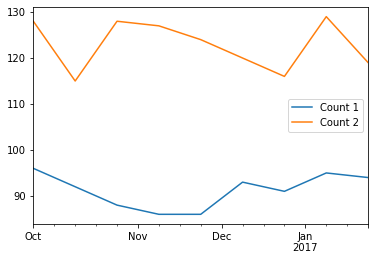

In [206]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()